# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

**Question 1**: What are we accomplishing with `as` reserved word?\
***Response:*** The `as` word is used as a reference to the library but in a different name. This is useful when you want to shorten the library, for example `numpy.sin()` is longer than `np.sin()`.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [3]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table
#print (df.head(10))   

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  


**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?\
***Response:*** You will need to pass in 10 in the head function `print (df.head(10))`

There are different ways of exploring and indexing the table. Here are some examples.

In [39]:
print (list(df.columns))
print (df[0:5])         # print the first 5 rows, same outcome as df.head()
print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
print (df.iloc[[0,1,5],0:5])   # uses 'ix' indexing, selects rows and columns based on their location in the table
# print (df[-5:])
# print (df[401:406])
# print (df[df['Cylinders']==3]['Car'])

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  
                         Car   MPG
0  Chevrolet Chevelle Malibu  18.0
1          Buick Skylark 320  15.0
2         Plymouth Satellite  18.0
3              AMC Rebel SST  16.0
4                Ford Torino  1

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.\
***Response:*** There are two ways to print df last 5 rows `print (df[-5:])` and `print (df[401:406])`. The first way is getting the last 5 and the other way is finding a way to index the last 5 rows. This find the names of cars with 3 cylinders `print (df[df['Cylinders']==3]['Car'])`. They are Mazda RX2 Coupe, Mazda RX3, Mazda RX-4, and Mazda RX-7 GS, I believe they are rotary engines :) .

Now, we are ready to start plotting the data.

                           Car   MPG  Cylinders  Displacement  Horsepower  \
0    Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1            Buick Skylark 320  15.0          8         350.0         165   
2           Plymouth Satellite  18.0          8         318.0         150   
3                AMC Rebel SST  16.0          8         304.0         150   
4                  Ford Torino  17.0          8         302.0         140   
..                         ...   ...        ...           ...         ...   
400           Chevrolet Camaro  27.0          4         151.0          90   
401            Ford Mustang GL  27.0          4         140.0          86   
403              Dodge Rampage  32.0          4         135.0          84   
404                Ford Ranger  28.0          4         120.0          79   
405                 Chevy S-10  31.0          4         119.0          82   

     Weight  Acceleration  Model Origin  
0      3504          12.0     70 

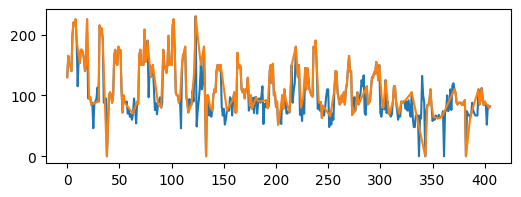

In [44]:
plt.figure(figsize=(6,2))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute
USHP = df[df['Origin']=='US']['Horsepower']
print(df[df['Origin']=='US'])
plt.plot(USHP)

**Question 4**: Plot *Horsepower* attribute, but only for the US cars.\
***Response:*** `plt.plot(df[df['Origin']=='US']['Horsepower'])` This will plot the Horsepower of all US origin cars. 

To plot the histogram of a selected attribute:

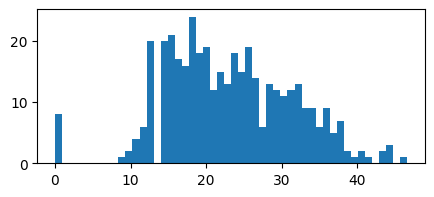

In [76]:
fig = plt.figure(figsize=(5,2))
plt.hist(df['MPG'], bins=50);   # ; suppresses Out
# plt.hist(df['Cylinders'], bins=10) 

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why.\
***Response:*** The histogram shows that most of the MPG are 15-25 range and most of the cars are 4 cylinders. We can set `bins=50` for MPG and `bins = 10` for Cylinders because mpg has more individual data points compared to there is a smaller variation of cylinder sizes.

The following code provides statistics for number of cylinders.

In [87]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")   # Name the count column
t['percentage']= (t/t.sum())*100
print (t)
a = pd.crosstab(index=df["Cylinders"],columns=df['MPG'])

print(a)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985
MPG        0.0   9.0   10.0  11.0  12.0  13.0  14.0  14.5  15.0  15.5  ...  \
Cylinders                                                              ...   
3             0     0     0     0     0     0     0     0     0     0  ...   
4             3     0     0     0     0     0     0     0     0     0  ...   
5             0     0     0     0     0     0     0     0     0     0  ...   
6             0     0     0     0     0     0     0     0     4     0  ...   
8             5     1     2     4     6    20    19     1    12     5  ...   

MPG        39.4  40.8  40.9  41.5  43.1  43.4  44.0  44.3  44.6  46.6  
Cylinders                                                              
3             0     0     0     0     0     0     0     0     0     0  
4             1     1     1     1 

**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.\
***Response:*** In this data we compared MPG and Cylinders, we can see that higher MPG have lower cylinders.

Horizontal bar plot:

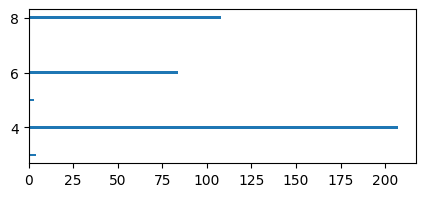

In [110]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"], height = 0.1);

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?\
***Response:*** Yes can we change change the height lower than 0.8(it's the default).

Pie chart:

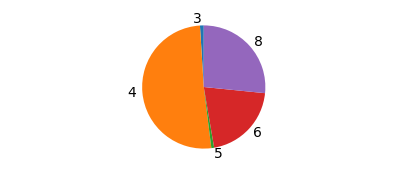

In [111]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

**Question 8**: Do you prefer bar or pie displayed chart and why?\
***Response:*** I would prefer a bar graph because we can see the distribution

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

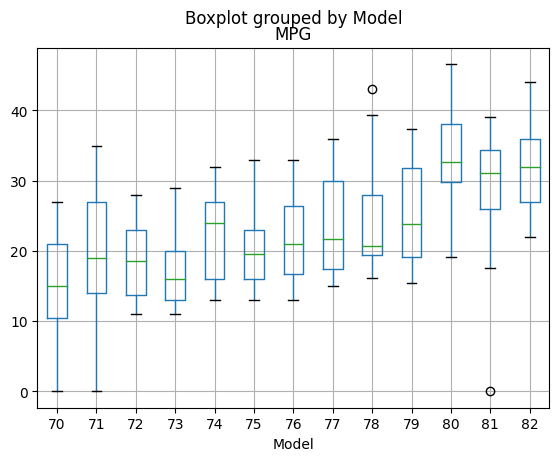

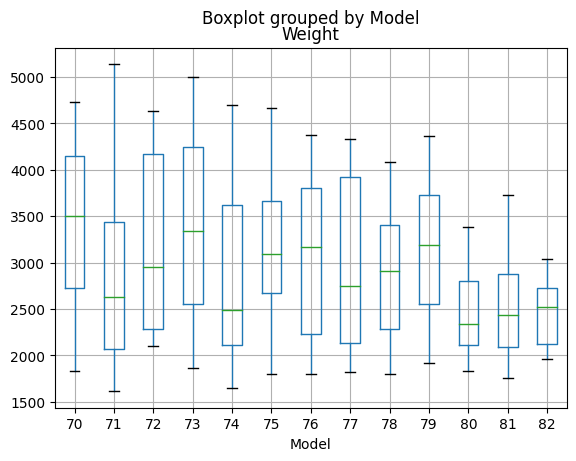

In [118]:
df.boxplot(column='MPG',by='Model');
df.boxplot(column='Weight',by='Model');

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?\
***Response:*** From the boxplot we have learned newer car has better MPG and from my plot we also saw the weight of the cars also went down. 

Scatterplot between MPG and Weight attributes:

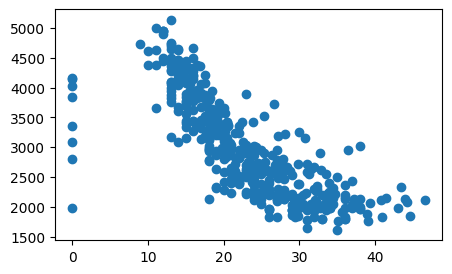

In [119]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.\
***Response:*** In this scatterplot we found a correlation that higher MPG also mean lower weight. They are indirectly proportion to eachother.

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

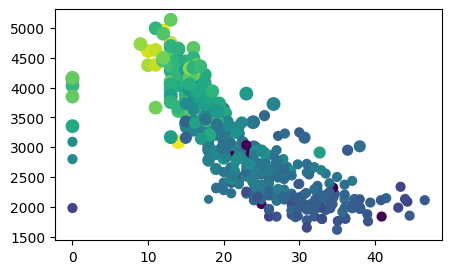

In [125]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight'],df['Cylinders']*10,df['Horsepower']);

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.\
***Response:*** From this scatterplot, the larger the dots the more cylinders the car has and the darker color the dots are, the more horsepower the car has. So we can conclude that cylinder and horsepower are directly proportional.

Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

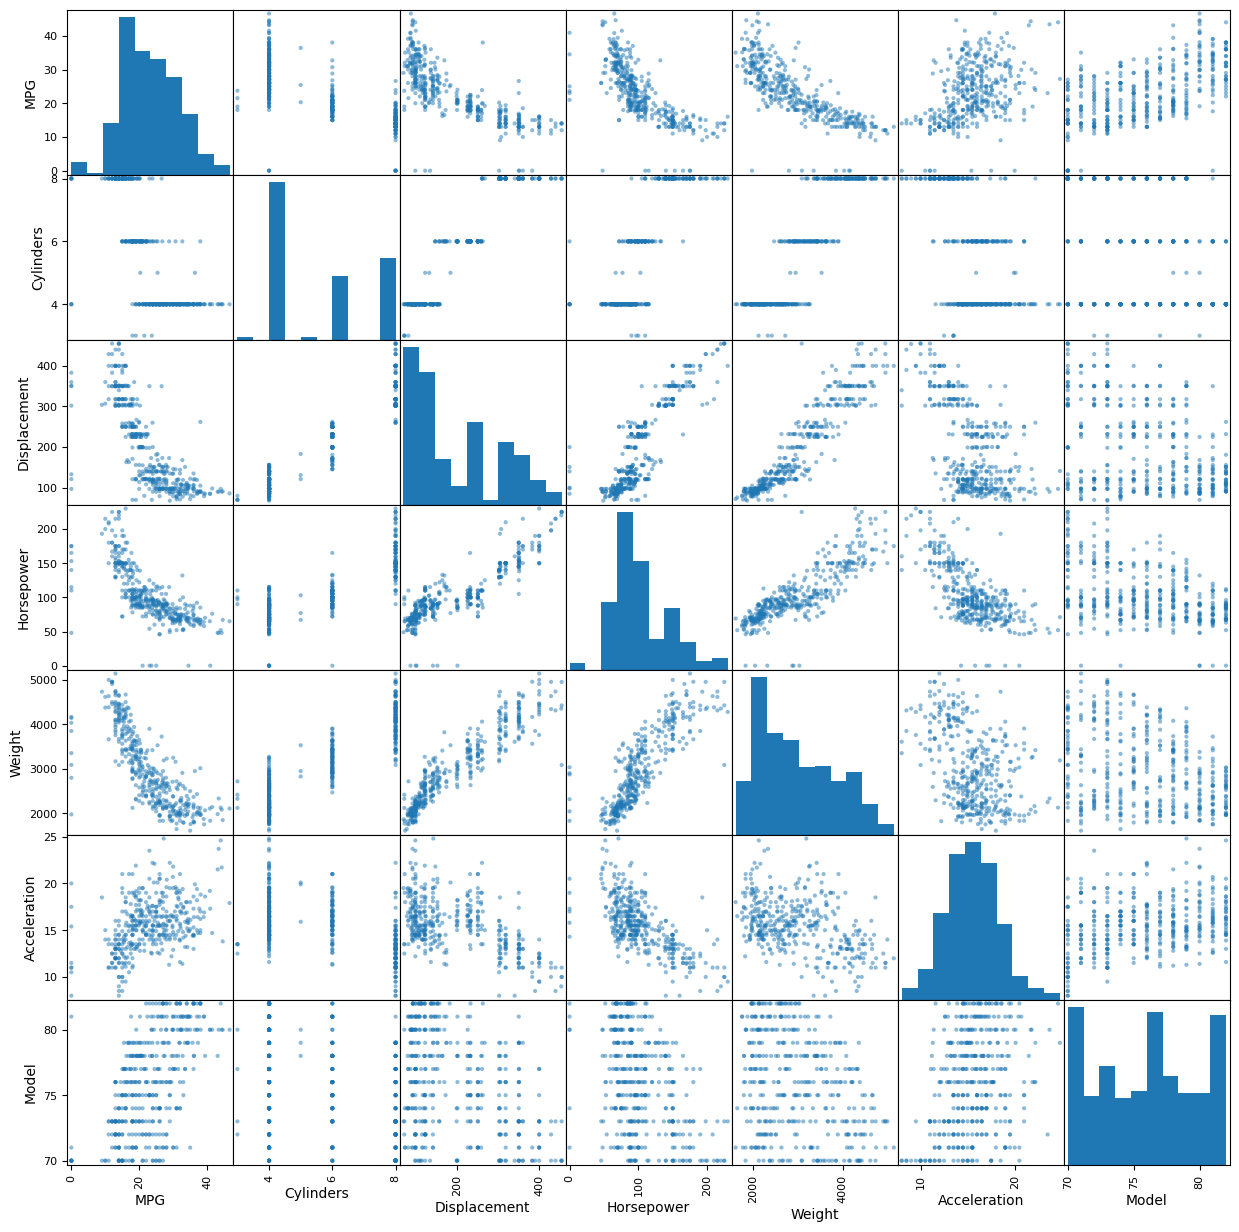

In [16]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.\
***Response:*** We see everything in this plot of everything. It shows a plots of comparison between all of the individual traits.


When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.

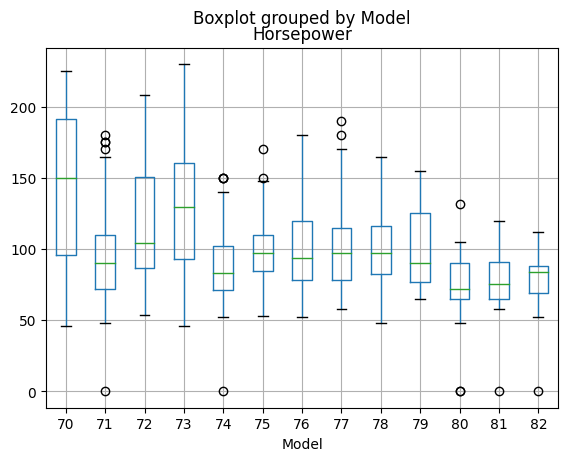

In [8]:
df.boxplot(column='Horsepower',by='Model');

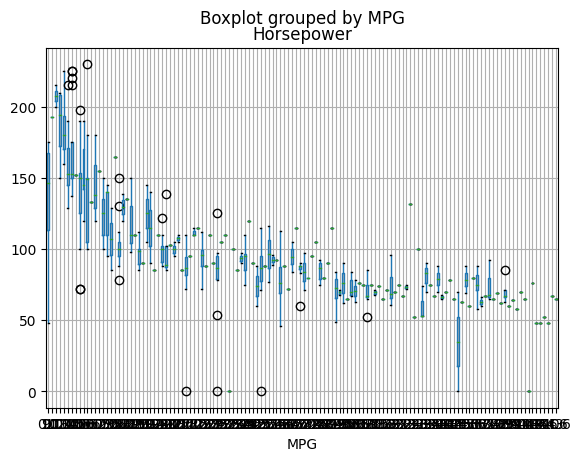

In [9]:
df.boxplot(column='Horsepower',by='MPG');

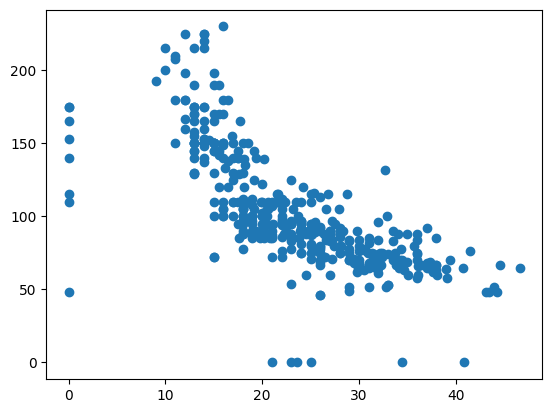

In [10]:
plt.scatter(df['MPG'],df['Horsepower']);

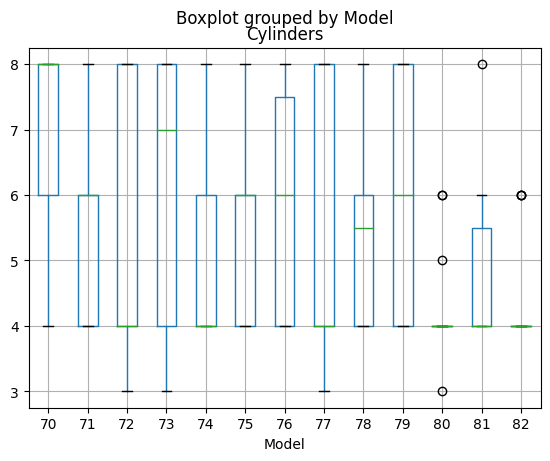

In [13]:
df.boxplot(column='Cylinders',by='Model');